In [1]:
# !pip install matplotlib

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### 데이터 가져오기

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 이미지 확인

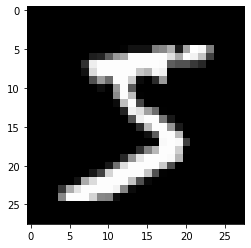

In [4]:
plt.imshow(X_train[0], cmap='gray')

### X값 1차원으로 변경

In [5]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [6]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### 정답 원 핫 인코딩

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 모델생성

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# model 쌓는 부분
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
# model compile 
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,
                    epochs=50,
                    validation_split=0.2,
                   batch_size=200)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 28us/sample - loss: 5.5809 - accuracy: 0.8968 - val_loss: 1.9617 - val_accuracy: 0.9269
Epoch 2/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.9955 - accuracy: 0.9513 - val_loss: 1.0787 - val_accuracy: 0.9477
Epoch 3/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4429 - accuracy: 0.9697 - val_loss: 0.8543 - val_accuracy: 0.9579
Epoch 4/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.2819 - accuracy: 0.9766 - val_loss: 0.7937 - val_accuracy: 0.9616
Epoch 5/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.2218 - accuracy: 0.9806 - val_loss: 0.8228 - val_accuracy: 0.9618
Epoch 6/50
48000/48000 [==============================] - 1s 18us/sample - loss: 0.2138 - accuracy: 0.9817 - val_loss: 0.8382 - val_accuracy: 0.9632
Epoch 7/50
48000/48000 [==============================] 

In [13]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 1.5205 - accuracy: 0.9750


[1.5205301077423783, 0.975]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 결과 시각화

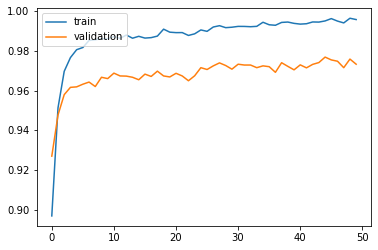

In [15]:
plt.plot(history.history['accuracy']) # 훈련데이터
plt.plot(history.history['val_accuracy']) # 검증데이터
plt.legend(['train','validation'], loc='upper left')
# plt.ylim(0.94,1.00)
# plt.xlim(30,40)

### 손글씨 직접 판단시켜보기

In [16]:
# !pip install Pillow

In [11]:
from PIL import Image,ImageOps
import numpy as np

In [18]:
image = Image.open('./number.png').convert('L') # 흑백변환
image

In [19]:
image = ImageOps.invert(image) # 255가 흰색 -> 0이 흰색
image_arr = np.array(image)
image_arr.shape

(28, 28)

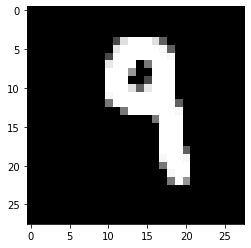

In [20]:
plt.imshow(image_arr, cmap='gray')

In [21]:
model.predict_classes(image_arr.reshape(1,-1))

array([9], dtype=int64)

### best 모델 저장, 학습조기중단

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
earlyStopping = EarlyStopping(monitor='val_accuracy',
                             patience=15)

In [24]:
path = "./model/MNIST_{epoch:03d}_{val_accuracy:.4f}.hdf5"
modelCheckPoint = ModelCheckpoint(filepath=path,
                                 monitor='val_accuracy',
                                 verbose=1,
                                 save_best_only=True)

In [25]:
# model 쌓는 부분
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
# model compile 
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train,y_train,
                    epochs=50,
                    validation_split=0.2,
                   batch_size=200,
                   callbacks=[earlyStopping,modelCheckPoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
45800/48000 [===========================>..] - ETA: 0s - loss: 6.2280 - accuracy: 0.8904
Epoch 00001: val_accuracy improved from -inf to 0.93900, saving model to ./model/MNIST_001_0.9390.hdf5
48000/48000 [==============================] - 1s 27us/sample - loss: 5.9924 - accuracy: 0.8929 - val_loss: 1.6864 - val_accuracy: 0.9390
Epoch 2/50
46800/48000 [============================>.] - ETA: 0s - loss: 0.9729 - accuracy: 0.9522
Epoch 00002: val_accuracy improved from 0.93900 to 0.94658, saving model to ./model/MNIST_002_0.9466.hdf5
48000/48000 [==============================] - 1s 20us/sample - loss: 0.9712 - accuracy: 0.9522 - val_loss: 1.1465 - val_accuracy: 0.9466
Epoch 3/50
45800/48000 [===========================>..] - ETA: 0s - loss: 0.4807 - accuracy: 0.9673
Epoch 00003: val_accuracy improved from 0.94658 to 0.95400, saving model to ./model/MNIST_003_0.9540.hdf5
48000/48000 [==============================] - 1s 25us/samp

### 모델 로딩

In [13]:
from tensorflow.keras.models import load_model

In [28]:
final_model = load_model('./model/MNIST_039_0.9747.hdf5')

In [29]:
final_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 1.1815 - accuracy: 0.9738


[1.1814964417956269, 0.9738]

### 만약에 사진이 회전되어있다면 어떨까???

In [30]:
X_test.shape

(10000, 784)

In [15]:
X_test_28_28 = X_test.reshape(10000,28,28)
X_test_28_28.shape

(10000, 28, 28)

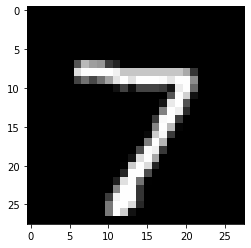

In [16]:
plt.imshow(X_test_28_28[0], cmap='gray')

In [17]:
angle = np.random.randint(0,360)
Image.fromarray(X_test_28_28[0]).rotate(angle)

In [18]:
rotate_test = []
for i in range(10000):
    angle = np.random.randint(0,360)
    img = Image.fromarray(X_test_28_28[i]).rotate(angle)
    rotate_test.append(np.array(img))

In [19]:
rotate_test = np.array(rotate_test)
rotate_test.shape

(10000, 28, 28)

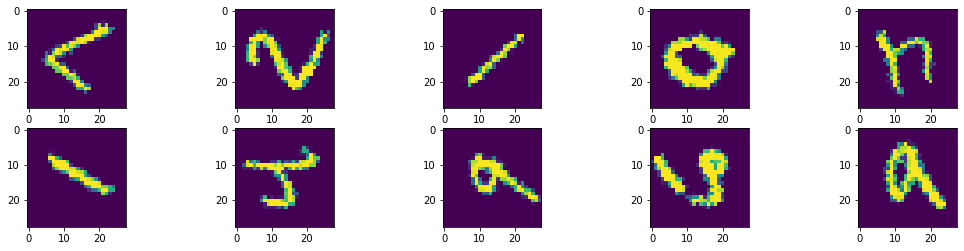

In [20]:
figure, axes = plt.subplots(nrows=2,ncols=5)
figure.set_size_inches(18,4)

axes[0][0].imshow(rotate_test[0])
axes[0][1].imshow(rotate_test[1])
axes[0][2].imshow(rotate_test[2])
axes[0][3].imshow(rotate_test[3])
axes[0][4].imshow(rotate_test[4])

axes[1][0].imshow(rotate_test[5])
axes[1][1].imshow(rotate_test[6])
axes[1][2].imshow(rotate_test[7])
axes[1][3].imshow(rotate_test[8])
axes[1][4].imshow(rotate_test[9])

In [106]:
rotate_test = rotate_test.reshape(10000,-1)
rotate_test.shape

(10000, 784)

In [108]:
final_model.evaluate(rotate_test,y_test)

10000/10000 [==============================] - 0s 32us/sample - loss: 110.4693 - accuracy: 0.3668


[110.46932596435546, 0.3668]

### train data rotate

In [23]:
X_train_28_28 = X_train.reshape(60000,28,28)
X_train_28_28.shape

(60000, 28, 28)

In [24]:
rotate_train = []
for i in range(60000):
    angle = np.random.randint(0,360)
    img = Image.fromarray(X_train_28_28[i]).rotate(angle)
    rotate_train.append(np.array(img))

In [25]:
rotate_train = np.array(rotate_train)
rotate_train.shape

(60000, 28, 28)

### CNN 적용하기

In [4]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten

In [5]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,kernel_size=(3,3),
                    input_shape=(28,28,1),
                    activation='relu',
                    padding='same'))
cnn_model.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    padding='same'))
cnn_model.add(MaxPool2D(pool_size=2))

cnn_model.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
cnn_model.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))

cnn_model.add(Conv2D(128,kernel_size=(3,3),
                    padding='same',
                    activation='relu'))
cnn_model.add(Conv2D(128,kernel_size=(3,3),
                    padding='same',
                    activation='relu'))
cnn_model.add(MaxPool2D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(512,input_dim=784,activation='relu'))
cnn_model.add(Dense(10,activation='softmax'))
# model compile 
cnn_model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [6]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [40]:
earlyStopping2 = EarlyStopping(monitor='val_accuracy',
                             patience=15)
path = "./model/CNN_{epoch:03d}_{val_accuracy:.4f}.hdf5"
modelCheckPoint2 = ModelCheckpoint(filepath=path,
                                 monitor='val_accuracy',
                                 verbose=1,
                                 save_best_only=True)

In [41]:
history = cnn_model.fit(rotate_train.reshape(60000,28,28,1),
                        y_train,
                    epochs=50,
                    validation_split=0.2,
                   batch_size=200,
                   callbacks=[earlyStopping2,modelCheckPoint2])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
47800/48000 [============================>.] - ETA: 0s - loss: 1.0356 - accuracy: 0.6659
Epoch 00001: val_accuracy improved from -inf to 0.88358, saving model to ./model/CNN_001_0.8836.hdf5
48000/48000 [==============================] - 87s 2ms/sample - loss: 1.0330 - accuracy: 0.6667 - val_loss: 0.3650 - val_accuracy: 0.8836
Epoch 2/50
47800/48000 [============================>.] - ETA: 0s - loss: 0.2473 - accuracy: 0.9209
Epoch 00002: val_accuracy improved from 0.88358 to 0.93600, saving model to ./model/CNN_002_0.9360.hdf5
48000/48000 [==============================] - 81s 2ms/sample - loss: 0.2474 - accuracy: 0.9210 - val_loss: 0.2034 - val_accuracy: 0.9360
Epoch 3/50
47800/48000 [============================>.] - ETA: 0s - loss: 0.1608 - accuracy: 0.9494
Epoch 00003: val_accuracy improved from 0.93600 to 0.94192, saving model to ./model/CNN_003_0.9419.hdf5
48000/48000 [==============================] - 76s 2ms/sample - l

Epoch 28/50
47800/48000 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9914
Epoch 00028: val_accuracy did not improve from 0.96675
48000/48000 [==============================] - 83s 2ms/sample - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.1861 - val_accuracy: 0.9621
Epoch 29/50
47800/48000 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9918
Epoch 00029: val_accuracy did not improve from 0.96675
48000/48000 [==============================] - 83s 2ms/sample - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.1821 - val_accuracy: 0.9618
Epoch 30/50
47800/48000 [============================>.] - ETA: 0s - loss: 0.0223 - accuracy: 0.9926
Epoch 00030: val_accuracy did not improve from 0.96675
48000/48000 [==============================] - 84s 2ms/sample - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.1882 - val_accuracy: 0.9583
Epoch 31/50
47800/48000 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9925
Epoch 00031: val_

In [42]:
final_cnn_model = load_model('./model/CNN_021_0.9668.hdf5')

In [43]:
final_cnn_model.evaluate(rotate_test.reshape(10000,28,28,1),
                  y_test)

10000/10000 [==============================] - 4s 427us/sample - loss: 0.1973 - accuracy: 0.9640


[0.1972596633477121, 0.964]

### 회전된 데이터로 MLP 모델 만든후 점수 비교해보기

In [36]:
# model 쌓는 부분
mlp_model = Sequential()
mlp_model.add(Dense(512,input_dim=784,activation='relu'))
mlp_model.add(Dense(10,activation='softmax'))
# model compile 
mlp_model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [37]:
history = mlp_model.fit(rotate_train.reshape(60000,784),
                        y_train,
                    epochs=50,
                    validation_split=0.2,
                   batch_size=200)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 29us/sample - loss: 14.3875 - accuracy: 0.5803 - val_loss: 2.6876 - val_accuracy: 0.6577
Epoch 2/50
48000/48000 [==============================] - 1s 21us/sample - loss: 1.5768 - accuracy: 0.6909 - val_loss: 1.3736 - val_accuracy: 0.6968
Epoch 3/50
48000/48000 [==============================] - 1s 23us/sample - loss: 0.8629 - accuracy: 0.7744 - val_loss: 1.1677 - val_accuracy: 0.7477
Epoch 4/50
48000/48000 [==============================] - 1s 20us/sample - loss: 0.5815 - accuracy: 0.8329 - val_loss: 1.0437 - val_accuracy: 0.7761
Epoch 5/50
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4249 - accuracy: 0.8724 - val_loss: 0.9924 - val_accuracy: 0.7903
Epoch 6/50
48000/48000 [==============================] - 1s 20us/sample - loss: 0.3385 - accuracy: 0.8938 - val_loss: 0.9907 - val_accuracy: 0.8039
Epoch 7/50
48000/48000 [==============================]

In [38]:
mlp_model.evaluate(rotate_test.reshape(10000,784),y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 1.8376 - accuracy: 0.8808


[1.8376069408471838, 0.8808]